# Build a Surface model and a Moho model for the Moon

This notebook requires an environment with gdal installed - see below for how to install in the Conda environment. 



You need to download these two files to the folder input_files_others_work/

https://planetarymaps.usgs.gov/mosaic/Lunar_LRO_LOLA_Global_LDEM_118m_Mar2014.tif

The file is 7.9GB. 

and 

Model1_cmi.dat

Wieczorek, M. (2012). GRAIL Crustal Thickness Archive [Data set]. Zenodo. https://doi.org/10.5281/zenodo.997347

# UPDATE September 20, 2024 

# There is a problem with one of the dependencies - it looks as if one of the packages has changed. It needs updating. 

In [3]:
# This is the environment I installed
# conda create -n gdal python=3.8
# conda activate gdal
# conda install gdal
# conda install matplotlib
# conda install jupyter
# conda install -c conda-forge  netcdf4

In [22]:
from osgeo import gdal 
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import math
import os

MOON_RADIUS_IN_KM = 1737.1

In [23]:
# read in the original file - this takes many minutes 
print('Lunar_LRO_LOLA_Global_LDEM_118m_Mar2014')
ds = gdal.Open("input_files_others_work/Lunar_LRO_LOLA_Global_LDEM_118m_Mar2014.tif")
print(ds.GetProjectionRef())
props = ds.GetGeoTransform()
print('current pixel xsize:', props[1], 'current pixel ysize:', -props[-1])

# scaling factor in the orignal file 
scaling_factor = 0.5

# The LRO file has 1737400 m as the Moon's reference radius, so we should use that as the reference 
LRO_MOON_RADIUS_IN_KM = 1737.4

# print('min')
# print (undulation_surf.min(), MOON_RADIUS_IN_KM*1000 + undulation_surf.min())
# print('max')
# print (undulation_surf.max(), MOON_RADIUS_IN_KM*1000 + undulation_surf.max())

Lunar_LRO_LOLA_Global_LDEM_118m_Mar2014
PROJCS["SimpleCylindrical Moon",GEOGCS["GCS_Moon",DATUM["D_Moon",SPHEROID["Moon",1737400,0]],PRIMEM["Reference_Meridian",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Equirectangular"],PARAMETER["standard_parallel_1",0],PARAMETER["central_meridian",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
current pixel xsize: 118.4505876 current pixel ysize: 118.4505876


<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f9a85db7ae0> >


In [26]:
# # optional, check that the projection is ok (note that the x and y axis are number of items in the array)
# # takes a minute or so

# array = ds.GetRasterBand(1).ReadAsArray()

# print('min')
# print (array.min(), MOON_RADIUS_IN_KM*1000 + array.min())
# print('max')
# print (array.max(), MOON_RADIUS_IN_KM*1000 + array.max())

# plt.imshow(array)
# plt.colorbar()
# plt.show()



In [ ]:
# # some example Warps (not used)
# # orthographic projection
# kwargs = {'format': 'GTiff',  'dstSRS':'+proj=ortho +lat=90 +lon_0=0 +R=1737400'}
# # 'geoloc': False,
# # "+proj=ortho +lat=90 +lon_0=0 +R=1737400
# # ds_vsmall = gdal.Warp(destNameOrDestDS="output_files/Lunar_LRO_LOLA_Global_LDEM_118m_Mar2014_downsampled_1000mXXX.tif", srcDSOrSrcDSTab=ds_small, xRes = 2000, yRes = 2000, **kwargs) 
# ds_vsmall = gdal.Warp(destNameOrDestDS="output_files/Lunar_LRO_LOLA_Global_LDEM_118m_Mar2014_downsampled_1000mXXX.tif", srcDSOrSrcDSTab=ds_small, **kwargs)

# # +proj=longlat
# print('Warp completed')
# print(ds_vsmall.GetProjectionRef())

In [ ]:
# # some example Warps (not used) and how to set up the parameters
# after some research i did the following:
# gdalwarp -s_srs "+proj=eqc +R=1737400" -t_srs "+proj=ortho +lat=90 +lon_0=0 +R=1737400" input.tif output.tif
# So basically what caused the error was the -s_srs definition. Since it was the moons dem I had to specify the Radius by +R=1737400. Hope this helps!

# kwargs = {'format': 'GTiff', 'geoloc': True}

#         options – can be be an array of strings, a string or let empty and filled from other keywords.

#         format – output format (“GTiff”, etc…)

#         srcBands – list of source band numbers (between 1 and the number of input bands)

#         dstBands – list of output band numbers

#         outputBounds – output bounds as (minX, minY, maxX, maxY) in target SRS

#         outputBoundsSRS – SRS in which output bounds are expressed, in the case they are not expressed in dstSRS

#         xRes – output resolution in target SRS

#         yRes – output resolution in target SRS

#         targetAlignedPixels – whether to force output bounds to be multiple of output resolution

#         width – width of the output raster in pixel

#         height – height of the output raster in pixel

#         srcSRS – source SRS

#         dstSRS – output SRS

#         coordinateOperation – coordinate operation as a PROJ string or WKT string

#         srcAlpha – whether to force the last band of the input dataset to be considered as an alpha band. If set to False, source alpha warping will be disabled.

#         dstAlpha – whether to force the creation of an output alpha band

#         outputType – output type (gdalconst.GDT_Byte, etc…)

#         workingType – working type (gdalconst.GDT_Byte, etc…)

#         warpOptions – list of warping options

#         errorThreshold – error threshold for approximation transformer (in pixels)

#         warpMemoryLimit – size of working buffer in MB

#         resampleAlg – resampling mode

#         creationOptions – list of creation options

#         srcNodata – source nodata value(s)

#         dstNodata – output nodata value(s)

#         multithread – whether to multithread computation and I/O operations

#         tps – whether to use Thin Plate Spline GCP transformer

#         rpc – whether to use RPC transformer

#         geoloc – whether to use GeoLocation array transformer

#         polynomialOrder – order of polynomial GCP interpolation

#         transformerOptions – list of transformer options

#         cutlineDSName – cutline dataset name

#         cutlineLayer – cutline layer name

#         cutlineWhere – cutline WHERE clause

#         cutlineSQL – cutline SQL statement

#         cutlineBlend – cutline blend distance in pixels

#         cropToCutline – whether to use cutline extent for output bounds

#         copyMetadata – whether to copy source metadata

#         metadataConflictValue – metadata data conflict value

#         setColorInterpretation – whether to force color interpretation of input bands to output bands

#         overviewLevel – To specify which overview level of source files must be used

#         callback – callback method

#         callback_data – user data for callback

## Section 2 - 1 degree of latitude downsize

In [30]:
print('Reducing the pixel size to 1 degree')
tmp_file = "output_files/Lunar_LRO_LOLA_Global_LDEM_118m_Mar2014_downsampled_1deg1.tif"
ds_vsmall = gdal.Warp(destNameOrDestDS=tmp_file, srcDSOrSrcDSTab=ds, width = 360+1, height = 180+1) 


props_vsmall = ds_vsmall.GetGeoTransform()
print('new pixel xsize:', props_vsmall[1], 'new pixel ysize:', -props_vsmall[-1])

# The tif is not required
os.remove(tmp_file)

Reducing the pixel size to 1 degree
new pixel xsize: 30239.352224975068 new pixel ysize: 30155.818102806625


In [31]:
print('The netcdf file for axisem needs ascending coordinates.')
grid_lat_vsmall = np.linspace(-90, 90, num=ds_vsmall.RasterYSize)
grid_lon_vsmall = np.linspace(-180, 180, num=ds_vsmall.RasterXSize)

print(ds_vsmall.RasterYSize)
# print(len(grid_lat1), grid_lat1)
print(ds_vsmall.RasterXSize)
# print(len(grid_lon1), grid_lon1)

# make the undulation surface in meters WITHOUT a scaling factor
array_undulation_surf_vsmall = ds_vsmall.GetRasterBand(1).ReadAsArray() * scaling_factor
print(array_undulation_surf_vsmall.shape)
 

The netcdf file for axisem needs ascending coordinates.
181
361
(181, 361)


In [42]:
# f.close()

filename_vsmall = 'output_files/Lunar_LRO_LOLA_Global_LDEM_118m_Mar2014_downsampled_1deg.nc'

f = nc4.Dataset(filename_vsmall, 'w', format='NETCDF4')
# Create dimension arrays
# We now create the dimensions:
lat = f.createDimension('lat', len(grid_lat_vsmall))
lon = f.createDimension('lon', len(grid_lon_vsmall))
# depth = f.createDimension('depth', self.nz)
# radius = f.createDimension('radius', len(grid_radius))

# Creating the variables:
lats = f.createVariable('lat', 'f4', ('lat',))
lats.units = 'degrees_north'
lats.long_name = 'latitude'

lons = f.createVariable('lon', 'f4', ('lon',))
lons.units = 'degrees_east'
lons.long_name = 'longitude'

# z = f.createVariable('radius', 'f4', ('radius',))
# z.units = 'meters'
# z.positive = 'up'

# z = f.createVariable('surface', 'f4', ('surface',))
# z.units = 'meters'


# v_rho = f.createVariable('rho', 'f4', ('lat', 'lon', 'depth',))
# v_vp = f.createVariable('vp', 'f4', ('lat', 'lon', 'depth',))
# v_vs = f.createVariable('vs', 'f4', ('lat', 'lon', 'depth',))

# v_rho = f.createVariable('rho', 'f4', ('lat', 'lon'))
# v_vp = f.createVariable('vp', 'f4', ('lat', 'lon'))
# v_vs = f.createVariable('vs', 'f4', ( 'lat', 'lon'))

# Assigning values to the variables:
lats[:] = grid_lat_vsmall
lons[:] = grid_lon_vsmall
# z[:] = grid_radius

f.contributor = 'Moon LRO LOLA DEM 118m v1\n see https://astrogeology.usgs.gov/search/details/Moon/LRO/LOLA/Lunar_LRO_LOLA_Global_LDEM_118m_Mar2014\nDownsampled to 1 degree.'
f.contributor_role = ''
# f.locationID = locationID[i]
# f.methods = 'Plankton net-tow'
f.language = 'en'
# f.publisher = 'CeNCOOS'
# stuff to add
#newnc.eventID=
#newnc.parentEventID=
#newnc.occurrenceID (basically what our variable is)
# set up spatial extent
# f.geodeticDatum = 'EPSG:4326'
# f.geospatial_lat_max = mylatitude[i]
# f.geospatial_lat_min = mylatitude[i]
f.geospatial_lat_units = 'degrees_north'
# f.geospatial_lon_max = mylongitude[i]
# f.geospatial_lon_min = mylongitude[i]
f.geospatial_lon_units = 'degrees_east'
# f.geospatial_vertical_max = 0
# f.geospatial_vertical_min = -10
# f.geospatial_vertical_positive = 'up'
# f.geospatial_units = 'meters'
# f.geospatial_reference = 'mean_sea_level'

# v_rho[:, :, :] = self.bm_rho
# v_vp[:, :, :] = self.bm_vp
# v_vs[:, :, :] = self.bm_vs
# copy the array, reversing the depth parameter to use radius
# v_rho[:, :] = np.ones((len(grid_lat), len(grid_lon)))
# v_vp[:, :] = np.ones((len(grid_lat), len(grid_lon)))
# v_vs[:, :] = np.ones((len(grid_lat), len(grid_lon)))


undulation_surf = f.createVariable('undulation_surf', 'f4', ('lat', 'lon'))
print('begin latitude in bottom left corner at -90 and longitude is unchanged at -180')
undulation_surf[:, :] = array_undulation_surf_vsmall[::-1, :]
print('Note that the undulation surface is relative to 1737.4 km, as specified by the LRO DEM.')

# moho_surf_test = f.createVariable('moho_surf_test', 'f4', ('lat', 'lon'))
# print('begin latitude in bottom left corner at -90 and longitude is unchanged at -180')
# moho_surf_test[:, :] = array_undulation_surf_vsmall[::-1, :]*-1.
# print('Note that the Moho test surface is relative to 1737.10 - 28 =  1709.1 km. It is a flipped verison of the surface.')

f.close()
print('Data written to file ', filename_vsmall)

begin latitude in bottom left corner at -90 and longitude is unchanged at -180
Note that the undulation surface is relative to 1737.4 km, as specified by the LRO DEM.
Data written to file  output_files/Lunar_LRO_LOLA_Global_LDEM_118m_Mar2014_downsampled_1deg.nc


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    contributor: Moon LRO LOLA DEM 118m v1
 see https://astrogeology.usgs.gov/search/details/Moon/LRO/LOLA/Lunar_LRO_LOLA_Global_LDEM_118m_Mar2014
Downsampled to 1 degree.
    contributor_role: 
    language: en
    geospatial_lat_units: degrees_north
    geospatial_lon_units: degrees_east
    dimensions(sizes): lat(181), lon(361)
    variables(dimensions): float32 lat(lat), float32 lon(lon), float32 undulation_surf(lat, lon)
    groups: 
(181, 361)
undulation_surf:
min
-8478.5 1728621.5
max
9747.0 1746847.0
The matrix undulation_surf starts in the lower left (at -180, -90), so we set origin='lower' to display it here.


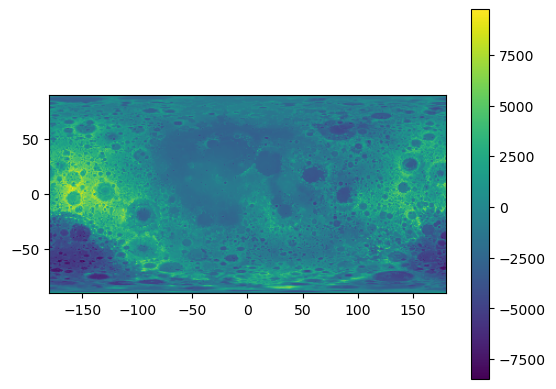

In [44]:
# read in (final check)
ds_final = nc4.Dataset(filename_vsmall)
print(ds_final)
undulation_surf = ds_final.variables['undulation_surf'][:]
print(undulation_surf.shape)

print('undulation_surf:')
print('min')
print (undulation_surf.min(), MOON_RADIUS_IN_KM*1000 + undulation_surf.min())
print('max')
print (undulation_surf.max(), MOON_RADIUS_IN_KM*1000 + undulation_surf.max())

# moho_surf_test = ds_final.variables['moho_surf_test'][:]

# print('moho_surf_test:')
# print('min')
# print (moho_surf_test.min(), (MOON_RADIUS_IN_KM-28)*1000  + moho_surf_test.min(), 28000 - moho_surf_test.min())
# print('max')
# print (moho_surf_test.max(), (MOON_RADIUS_IN_KM-28)*1000 + moho_surf_test.max(), 28000 - moho_surf_test.max())


print("The matrix undulation_surf starts in the lower left (at -180, -90), so we set origin='lower' to display it here.")
plt.imshow(undulation_surf,origin='lower',extent=[-180,180,-90,90])
plt.colorbar()
plt.show()

## Section 3 - Crustal thickness from Wieczorek et al., 2013.

#### Wieczorek, M., 2012. Grail Crustal Thickness Archive. https://doi.org/10.5281/ZENODO.997347


In [18]:
# read in the original file
print('Model 1 - Wieczorek et al., 2013')
# file was downloaded from 
# Depth of the crust-mantle interface below mean planetary radius expanded on a grid.
lines = np.loadtxt("input_files_others_work/Model1_cmi.dat", comments="#", delimiter=",", unpack=False)

lat1 = 721
lon1 = 1441
Model1_av_thickness = 34.

Model1_cmi_array = lines.reshape(721, 1441)
print(Model1_cmi_array.shape)
print(Model1_cmi_array.min(), Model1_cmi_array.max())


# lines = np.loadtxt("input_files_others_work/Model1_thick.dat", comments="#", delimiter=",", unpack=False)

# Model1_thickness_array = lines.reshape(721, 1441)
# print(Model1_thickness_array.shape)
# print(Model1_thickness_array.min(), Model1_thickness_array.max())



# # read in the original file
# lines = np.loadtxt("input_files/LOLA_PA_310.dat", comments="#", delimiter=",", unpack=False)

# LOLA_PA_310_array = lines.reshape(721, 1441)
# print(LOLA_PA_310_array.shape)
# print(LOLA_PA_310_array.min(), LOLA_PA_310_array.max())


filename_Wieczorek_Model1_cmi = 'output_files/Wieczorek_Model1_cmi.nc'

f = nc4.Dataset(filename_Wieczorek_Model1_cmi, 'w', format='NETCDF4')
# Create dimension arrays
# We now create the dimensions:
lat = f.createDimension('lat', lat1)
lon = f.createDimension('lon', lon1)

# Creating the variables:
lats = f.createVariable('lat', 'f4', ('lat',))
lats.units = 'degrees_north'
lats.long_name = 'latitude'

lons = f.createVariable('lon', 'f4', ('lon',))
lons.units = 'degrees_east'
lons.long_name = 'longitude'

# Assigning values to the variables:
lats_orig = np.arange(90,-90.25,-0.25)
lons_orig = np.arange(0,360.25,0.25)

# All ".dat" files are in an ASCII raster format where the first and last data 
# values represent the latitude and longitude coordinates (90N, 0E) and 
# (90S, 360E), respectively. The interval between data values is 0.25 degrees, 
# corresponding to a matrix having 721 latitudinal and 1441 longitudinal elements.
# Values for the gridded data are in either km or kg m-3, and the mean planetary 
# radius is 1737.151 km. All grids were constructed using spherical harmonic 
# expansions with degrees up to 310.

f.contributor = 'Wieczorek et al., 2013'
f.language = 'en'
f.geospatial_lat_units = 'degrees_north'
f.geospatial_lon_units = 'degrees_east'

# run the latitude the other way (from -90 to +90)
lats[:] = lats_orig[::-1]


# swap the longitude from 0 to 360 to -180 to +180 
# (move left side to the right and vice versa)

print(lons_orig[720])
# lons = np.empty_like(lons_orig)
lons[0:721] = lons_orig[720:1441]-360
lons[720:1441] = lons_orig[0:721]

print(lons[0:3])
print(lons[718:723])
print(lons[1438:])

print(lons[:].min(), lons[:].max())

# Just check it all worked (easier to check lat and lon than the array)
lats_compare = np.arange(-90,90.25,0.25)
lons_compare = np.arange(-180,180.25,0.25)

if not np.array_equal(lats_compare,lats[:]):
    print('Not equal')
if not np.array_equal(lons_compare,lons[:]):
    print('Not equal')


# swap the latitudes to start at -90
Model1_cmi_array[:, :] = Model1_cmi_array[::-1, :]
Model1_cmi_array2 = np.empty_like(Model1_cmi_array)
# swap the longitudes to start at -180 
Model1_cmi_array2[:,0:721] = Model1_cmi_array[:,720:1441]
Model1_cmi_array2[:,720:1441] = Model1_cmi_array[:,0:721]



print('Range of the depth of the Moho: ', Model1_cmi_array2[:,:].min()*-1, 'km', Model1_cmi_array2[:,:].max()*-1, 'km')
# Now calculate the variation at the Moho 
Model1_Moho_variation_28 = f.createVariable('Model1_Moho_variation_28', 'f4', ('lat', 'lon'))
Model1_Moho_variation_28[:, :] = (28+Model1_cmi_array2[:,:])*1000

print('Model1_Moho_variation_28')

# print(Model1_Moho_variation_28[:].min(), Model1_Moho_variation_28[:].max())
# Model1_Moho_variation_34 = f.createVariable('Model1_Moho_variation_34', 'f4', ('lat', 'lon'))
# Model1_Moho_variation_34[:, :] = (Model1_cmi_array2[:,:]*-1 - 34)*1000
# print('Model1_Moho_variation_34')
# print(Model1_Moho_variation_34[:].min(), Model1_Moho_variation_34[:].max())

# # swap the latitudes to start at -90
# Model1_thickness_array[:, :] = Model1_thickness_array[::-1, :]
# Model1_thickness_array2 = np.empty_like(Model1_thickness_array)
# Model1_thickness_array2[:,0:721] = Model1_thickness_array[:,720:1441]
# Model1_thickness_array2[:,720:1441] = Model1_thickness_array[:,0:721]


# # swap the latitudes to start at -90
# LOLA_PA_310_array[:, :] = LOLA_PA_310_array[::-1, :]
# # swap the longitudes to start at -180 
# LOLA_PA_310_array2 = np.empty_like(LOLA_PA_310_array)
# LOLA_PA_310_array2[:,0:721] = LOLA_PA_310_array[:,720:1441]
# LOLA_PA_310_array2[:,720:1441] = LOLA_PA_310_array[:,0:721]


view_all = False
if view_all:

#     LOLA_PA_310 = f.createVariable('LOLA_PA_310', 'f4', ('lat', 'lon'))
#     LOLA_PA_310[:, :] = LOLA_PA_310_array2[:,:]

    Model1_cmi = f.createVariable('Model1_cmi', 'f4', ('lat', 'lon'))
    Model1_cmi[:, :] = Model1_cmi_array2[:,:]

#     Model1_thickness = f.createVariable('Model1_thickness', 'f4', ('lat', 'lon'))
#     Model1_thickness[:, :] = Model1_thickness_array2[:,:]
    
    
# Using 28 as the reference thickness (it should be 34) hopefully prevents numerical instability 
# caused by have the Moho boundary very near to the surface. 
# min
# -33.84989
# max
# 24.137667


f.close()
print('Data written to file ', filename_Wieczorek_Model1_cmi)

Model 1 - Wieczorek et al., 2013
(721, 1441)
-61.8498920005856 -3.86233325515105
180.0
[-180.   -179.75 -179.5 ]
[-0.5  -0.25  0.    0.25  0.5 ]
[179.5  179.75 180.  ]
-180.0 180.0
Range of the depth of the Moho:  61.8498920005856 km 3.86233325515105 km
Model1_Moho_variation_28
Data written to file  output_files/Wieczorek_Model1_cmi.nc


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    contributor: Wieczorek et al., 2013
    language: en
    geospatial_lat_units: degrees_north
    geospatial_lon_units: degrees_east
    dimensions(sizes): lat(721), lon(1441)
    variables(dimensions): float32 lat(lat), float32 lon(lon), float32 Model1_Moho_variation_28(lat, lon)
    groups: 
-90.0 90.0
-180.0 180.0
min
-33849.89
max
24137.666


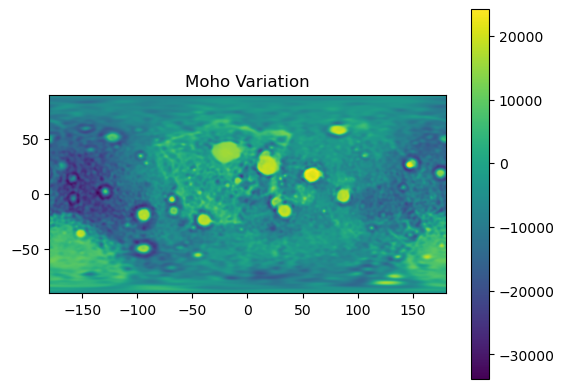

In [36]:
# read in (final check)
ds_final = nc4.Dataset(filename_Wieczorek_Model1_cmi)
print(ds_final)
Model1_Moho_variation_28 = ds_final.variables['Model1_Moho_variation_28'][:]


lats = ds_final.variables['lat'][:]
lons = ds_final.variables['lon'][:]
print(lats[:].min(), lats[:].max())
print(lons[:].min(), lons[:].max())

print('min')
print (Model1_Moho_variation_28.min())
print('max')
print (Model1_Moho_variation_28.max())

# print("The matrix undulation_surf starts in the lower left (at -180, -90), so we set origin='lower' to display it here.")
# plt.imshow(LOLA_PA_310,origin='lower',extent=[-180,180,-90,90])
plt.imshow(Model1_Moho_variation_28,origin='lower',extent=[-180,180,-90,90])
plt.colorbar()
plt.title("Moho Variation")
plt.show()